In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/home/asim/Documents/data_analytics/glass+identification/glass.data")
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values, 
                                                    data['Type of glass'].values, test_size=0.5, random_state=42)

In [24]:
def eculidean(p1,p2):
    s = 0
    for i in zip(p1,p2):
        s += np.square(i[0]-i[1])
    return np.sqrt(s)

In [70]:
from scipy import stats as st
def knn_algorthim(data,nn=7):
    dist = np.zeros(len(X_train))
    nei = []
    for i in range(len(X_train)):
        dist[i] = eculidean(data,X_train[i])
    for j in dist.argsort()[:nn]:
        nei.append(y_train[j])
        
    return st.mode(nei) # highest frequency class will be return

In [71]:
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    ot = knn_algorthim(X_test[i],nn=3)
    y_pred[i] = ot.mode

In [72]:
from sklearn import metrics 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = data['Type of glass'].unique())

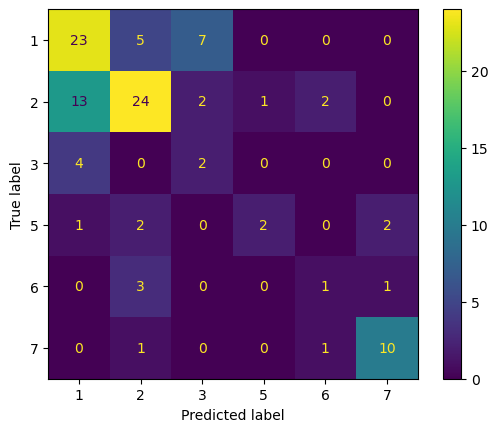

In [73]:
import matplotlib.pyplot as plt 
cm_display.plot()
plt.show() 

In [74]:
metrics.accuracy_score(y_test, y_pred)

0.5794392523364486

In [ ]:
variable = "Hi Subham !!"
print(f" so  we are embeding the above variable here {variable}")